In [1]:
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import geopandas as gpd
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import math
import reverse_geocoder as rg
from matplotlib.patches import Polygon

result = pyreadr.read_r('../Data/data_train_DF.RData') 
print(result.keys()) # let's check what objects we got
df1 = result["data_train_DF"]
df1['BA'] = df1['BA'].fillna(0)
df1['CNT'] = df1['CNT'].fillna(0)

odict_keys(['data_train_DF', 'u_ba', 'u_cnt', 'weights_ba', 'weights_cnt'])


In [2]:
df1

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
0,0.0,0.000000,-95.25,49.25,0.24,1993,3,0.000006,0.015857,0.000023,...,0.222032,0.166899,265.457680,268.867126,-0.005898,9.187450e+06,-5231370.50,97849.906250,-0.000340,0.000448
1,0.0,0.000000,-94.75,49.25,0.39,1993,3,0.000005,0.002749,0.000002,...,0.184119,0.142053,265.521764,268.412354,-0.001131,6.993830e+06,-4851900.00,97954.703125,-0.000264,0.000462
2,0.0,0.000000,-122.75,48.75,0.48,1993,3,0.002420,0.103964,0.003870,...,-0.952649,0.856508,276.699820,280.594666,-0.010519,1.052566e+07,-4860741.00,100808.468750,-0.001945,0.004545
3,3.0,8.000000,-122.25,48.75,1.00,1993,3,0.002988,0.237442,0.004040,...,-0.845677,0.462569,274.943327,278.574371,-0.008420,9.359787e+06,-4653411.50,98474.648438,-0.001256,0.006174
4,0.0,0.000000,-121.75,48.75,1.00,1993,3,0.000000,0.004782,0.000196,...,-0.504174,0.195447,271.235317,274.578064,-0.005976,7.479946e+06,-3889238.75,91660.625000,-0.000502,0.008110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563978,6.0,134.600006,-80.75,25.75,1.00,2015,9,0.014934,0.017630,0.001066,...,-0.464231,0.159478,296.832658,300.201447,-0.006076,1.632964e+07,-3884615.75,101323.140625,-0.004034,0.006132
563979,1.0,30.000000,-80.25,25.75,0.66,2015,9,0.014798,0.014336,0.001253,...,-0.649578,0.404771,297.139517,300.414673,-0.005535,1.552289e+07,-3794893.75,101300.398438,-0.003913,0.006199
563980,0.0,0.000000,-81.25,25.25,0.28,2015,9,0.000000,0.000000,0.000000,...,-0.849243,0.676130,297.105902,301.003082,-0.007343,1.738194e+07,-3929039.00,101333.078125,-0.004233,0.003420
563981,2.0,179.100006,-80.75,25.25,0.76,2015,9,0.015875,0.039337,0.000373,...,-0.838257,0.589142,297.059054,300.905426,-0.006938,1.732889e+07,-4057722.00,101332.671875,-0.004125,0.003929


In [4]:
#read shp file containing polygons of the US states 
#source: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
states1=gpd.read_file("../Data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")

In [3]:
wf=df1[df1['year']==1993]
wf=wf[wf['month']==3]
wf

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
0,0.0,0.000000,-95.25,49.25,0.24,1993,3,0.000006,0.015857,0.000023,...,0.222032,0.166899,265.457680,268.867126,-0.005898,9.187450e+06,-5231370.50,97849.906250,-0.000340,0.000448
1,0.0,0.000000,-94.75,49.25,0.39,1993,3,0.000005,0.002749,0.000002,...,0.184119,0.142053,265.521764,268.412354,-0.001131,6.993830e+06,-4851900.00,97954.703125,-0.000264,0.000462
2,0.0,0.000000,-122.75,48.75,0.48,1993,3,0.002420,0.103964,0.003870,...,-0.952649,0.856508,276.699820,280.594666,-0.010519,1.052566e+07,-4860741.00,100808.468750,-0.001945,0.004545
3,3.0,8.000000,-122.25,48.75,1.00,1993,3,0.002988,0.237442,0.004040,...,-0.845677,0.462569,274.943327,278.574371,-0.008420,9.359787e+06,-4653411.50,98474.648438,-0.001256,0.006174
4,0.0,0.000000,-121.75,48.75,1.00,1993,3,0.000000,0.004782,0.000196,...,-0.504174,0.195447,271.235317,274.578064,-0.005976,7.479946e+06,-3889238.75,91660.625000,-0.000502,0.008110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,4.0,204.199997,-80.75,25.75,1.00,1993,3,0.026120,0.018496,0.001668,...,-0.662139,0.114962,287.542184,293.475281,-0.007177,1.653520e+07,-5709372.00,101657.765625,-0.003006,0.002735
3499,11.0,116.599998,-80.25,25.75,0.66,1993,3,0.025647,0.015124,0.001890,...,-1.060640,0.301789,288.141454,293.684662,-0.006695,1.603385e+07,-5583978.50,101635.414062,-0.003184,0.002865
3500,0.0,0.000000,-81.25,25.25,0.28,1993,3,0.000000,0.000000,0.000000,...,-1.087983,-0.074585,289.153713,293.821259,-0.008034,1.802593e+07,-5755646.00,101670.585938,-0.003437,0.002155
3501,1.0,1.000000,-80.75,25.25,0.76,1993,3,0.020634,0.040493,0.000509,...,-1.165680,0.151659,288.790060,293.927643,-0.007568,1.751789e+07,-5806712.50,101669.007812,-0.003075,0.002450


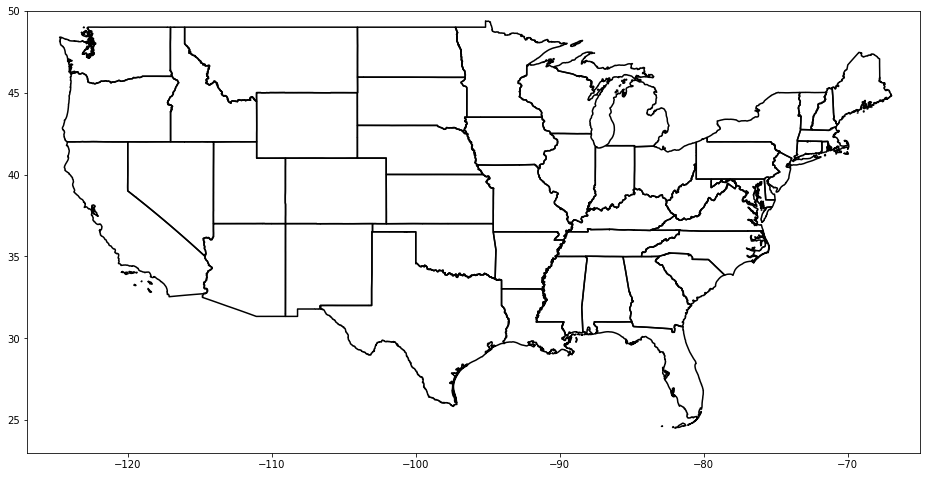

In [5]:
ax = states1.boundary.plot(color='Black',figsize=(16,12))
ax.set_xlim(-127, -65)
ax.set_ylim(23, 50)
#gdf = gpd.GeoDataFrame(
#    wf, geometry=gpd.points_from_xy(wf.lon, wf.lat))
#gdf.plot(ax=ax, color='red')
plt.show()

In [6]:
import reverse_geocoder as rg

coordinates = (51.5214588,-0.1729636),(9.936033, 76.259952),(37.38605,-122.08385)

results = rg.search(coordinates) # default mode = 2

print(results)

Loading formatted geocoded file...
[{'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}, {'lat': '9.93988', 'lon': '76.26022', 'name': 'Cochin', 'admin1': 'Kerala', 'admin2': 'Ernakulam', 'cc': 'IN'}, {'lat': '37.38605', 'lon': '-122.08385', 'name': 'Mountain View', 'admin1': 'California', 'admin2': 'Santa Clara County', 'cc': 'US'}]


In [5]:
l=[]
for i in range(len(wf)):
    p=(wf.lat.iloc[i],wf.lon.iloc[i])
    l.append(p)
coor=l
res=rg.search(coor)#search where the location belongs to

Loading formatted geocoded file...


In [8]:
lsta=[]
for i in res:
    lsta.append(i["admin1"])
lset=set(lsta)
for j in list(states1["NAME"]):
    if j in lset:
        lset.remove(j)
print(lset)

{'New Brunswick', 'Baja California', 'Quebec', 'British Columbia', 'Ontario', 'Sonora', 'Coahuila', 'Chihuahua', 'Tamaulipas'}


In [9]:
for i in res:
    if i["admin1"]=='Tamaulipas':
        i["admin1"]='Texas'
    if i["admin1"]=='British Columbia':
        i["admin1"]='Washington'
    if i["admin1"]=='Ontario':
        i["admin1"]="Minnesota"
    if i["admin1"]=='Chihuahua':
        i["admin1"]="New Mexico"
    if i["admin1"]=='Coahuila':
        i["admin1"]="Texas"
    if i["admin1"]=='New Brunswick':
        i["admin1"]="Maine"
    if i["admin1"]=='Sonora':
        i["admin1"]='Arizona'
    if i["admin1"]=='Baja California':
        i["admin1"]='California'
    if i["admin1"]=='Quebec':
        i["admin1"]="New York"

In [34]:
respd=pd.DataFrame(res)

In [6]:
#useful dictionaries

#source from https://www.census.gov/geographies/reference-files/2010/geo/state-area.html
totarea={
    "Alabama": 135767,
    "Arizona": 295234,
    "Arkansas": 137732,
    "California": 423967,
    "Colorado": 269601,
    "Connecticut": 14357,
    "Delaware": 6446,
    "Florida": 170312,
    "Georgia": 153910,
    "Idaho": 216443,
    "Illinois": 149995,
    "Indiana": 94326,
    "Iowa": 145746,
    "Kansas": 213100,
    "Kentucky": 104656,
    "Louisiana": 135659,
    "Maine": 91633,
    "Maryland": 32131,
    "Massachusetts": 27336,
    "Michigan": 250487,
    "Minnesota": 225163,
    "Mississippi": 125438,
    "Missouri": 180540,
    "Montana": 380831,
    "Nebraska": 200330,
    "Nevada": 286380,
    "New Hampshire": 24214,
    "New Jersey": 22591,
    "New Mexico": 314917,
    "New York": 141297,
    "North Carolina": 139391,
    "North Dakota": 183108,
    "Ohio": 116098,
    "Oklahoma": 181037,
    "Oregon": 254799,
    "Pennsylvania": 119280,
    "Rhode Island": 4001,
    "South Carolina": 82933,
    "South Dakota": 199729,
    "Tennessee": 109153,
    "Texas": 695662,
    "Utah": 219882,
    "Vermont": 24906,
    "Virginia": 110787,
    "Washington": 184661,
    "West Virginia": 62756,
    "Wisconsin": 169635,
    "Wyoming": 253335}

#acronyms to state
#source from:https://code.activestate.com/recipes/577305-python-dictionary-of-us-states-and-territories/
atos = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [7]:

def count_init():
    d={
    "Alabama": 0,
    "Alaska": 0,
    "Arizona": 0,
    "Arkansas": 0,
    "California": 0,
    "Colorado": 0,
    "Connecticut": 0,
    "District of Columbia": 0,
    "Delaware": 0,
    "Florida": 0,
    "Georgia": 0,
    "Hawaii": 0,
    "Idaho": 0,
    "Illinois": 0,
    "Indiana": 0,
    "Iowa": 0,
    "Kansas": 0,
    "Kentucky": 0,
    "Louisiana": 0,
    "Maine": 0,
    "Maryland": 0,
    "Massachusetts": 0,
    "Michigan": 0,
    "Minnesota": 0,
    "Mississippi": 0,
    "Missouri": 0,
    "Montana": 0,
    "Nebraska": 0,
    "Nevada": 0,
    "New Hampshire": 0,
    "New Jersey": 0,
    "New Mexico": 0,
    "New York": 0,
    "North Carolina": 0,
    "North Dakota": 0,
    "Ohio": 0,
    "Oklahoma": 0,
    "Oregon": 0,
    "Pennsylvania": 0,
    "Rhode Island": 0,
    "South Carolina": 0,
    "South Dakota": 0,
    "Tennessee": 0,
    "Texas": 0,
    "Utah": 0,
    "Vermont": 0,
    "Virginia": 0,
    "Washington": 0,
    "West Virginia": 0,
    "Wisconsin": 0,
    "Wyoming": 0}
    return d


def countfire(res,df):
    stcount=count_init()
    for i in range(len(res)):
        if res[i]['admin1'] in totarea.keys():
            stcount[res[i]['admin1']]+=df.CNT.iloc[i]/totarea[res[i]['admin1']]*100000
    return stcount

def areafire(res,df):
    stcount=count_init()
    for i in range(len(res)):
        if res[i]['admin1'] in totarea.keys():
            stcount[res[i]['admin1']]+=df.BA.iloc[i]/totarea[res[i]['admin1']]*100000
    return stcount



In [127]:
countfire(res,wf)

{'Alabama': 41.98369264990757,
 'Alaska': 0,
 'Arizona': 18.290576288638846,
 'Arkansas': 31.220050532919,
 'California': 15.567249337802227,
 'Colorado': 24.480621362680406,
 'Connecticut': 0.0,
 'District of Columbia': 0,
 'Delaware': 0.0,
 'Florida': 267.15674761613997,
 'Georgia': 612.6957312715225,
 'Hawaii': 0,
 'Idaho': 0.9240308071871115,
 'Illinois': 0.0,
 'Indiana': 3.180459258316901,
 'Iowa': 1.372250353354466,
 'Kansas': 0.4692632566870014,
 'Kentucky': 0.0,
 'Louisiana': 28.748553358052177,
 'Maine': 0.0,
 'Maryland': 0.0,
 'Massachusetts': 0.0,
 'Michigan': 0.39922231493051535,
 'Minnesota': 3.997104319981524,
 'Mississippi': 635.3736507278495,
 'Missouri': 125.1800155090285,
 'Montana': 7.089758974453235,
 'Nebraska': 0.4991763590076374,
 'Nevada': 0.6983727913960472,
 'New Hampshire': 0.0,
 'New Jersey': 13.279624629277146,
 'New Mexico': 40.96317442373706,
 'New York': 2.830916438424029,
 'North Carolina': 411.7912921207251,
 'North Dakota': 5.461257836904996,
 'Ohio':

In [13]:
areafire(res,wf)

{'Alabama': 2114.696503282616,
 'Alaska': 0,
 'Arizona': 274.59574433050244,
 'Arkansas': 809.7609794626628,
 'California': 284.9985962226538,
 'Colorado': 84.71778616539149,
 'Connecticut': 0.0,
 'District of Columbia': 0,
 'Delaware': 0.0,
 'Florida': 3427.996819201843,
 'Georgia': 3199.155328915247,
 'Hawaii': 0,
 'Idaho': 0.13860462314343655,
 'Illinois': 0.0,
 'Indiana': 40.81589381506689,
 'Iowa': 0.4116751223648388,
 'Kansas': 0.09385265273591377,
 'Kentucky': 0.0,
 'Louisiana': 892.3108654055819,
 'Maine': 0.0,
 'Maryland': 0.0,
 'Massachusetts': 0.0,
 'Michigan': 0.39922231493051535,
 'Minnesota': 6.439779195428343,
 'Mississippi': 13464.022060596157,
 'Missouri': 1853.218127210842,
 'Montana': 42.70398187523184,
 'Nebraska': 0.2495881795038187,
 'Nevada': 1.7808506185802486,
 'New Hampshire': 0.0,
 'New Jersey': 5.975831089770777,
 'New Mexico': 3029.3315292895622,
 'New York': 11.323665484773484,
 'North Carolina': 4139.148213692013,
 'North Dakota': 29.21772942744173,
 'Ohi

In [9]:
class states: #to avoid 'DataFrame' object has no attribute 'dtype' errors, and overwriting
    def __init__(self):
        self.states=gpd.read_file("../Data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")#have to recall for each update..?
        
    def add_column(self,colnum,colname,col):
        self.states.insert(colnum,colname,col,True)
        
    def delete_column(self,colname):
        self.states.drop(colname,axis=1)

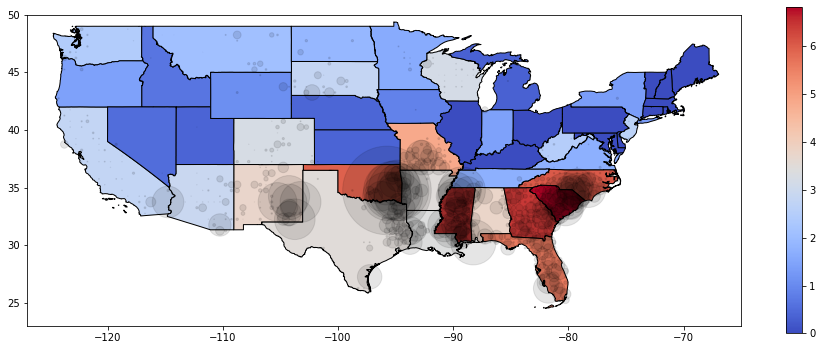

In [11]:
s=states()
lcf=[]
cf=countfire(res,wf)
dcf=dict({'States':list(cf.keys()),'Number':list(cf.values())})
dcf2=pd.DataFrame.from_dict(dcf)
for i in range(len(s.states)):
    if s.states["NAME"].iloc[i] in dcf["States"]:
        lcf.append(math.log(cf[s.states["NAME"].iloc[i]]+1))
    else:
        lcf.append(0)
s.add_column(2,"cf",lcf)
ax = s.states.plot(column="cf",cmap="coolwarm",figsize=(16,12), edgecolor='k', legend=True,legend_kwds={'shrink': 0.5})
ax.set_xlim(-127, -65)
ax.set_ylim(23, 50)
wf1=wf[wf["BA"]!=0]
gdf = gpd.GeoDataFrame(
    wf1, geometry=gpd.points_from_xy(wf1.lon, wf1.lat))
gdf.plot(ax=ax, color='black',alpha=0.1,markersize=wf1["BA"])
plt.show()
s.delete_column("cf")

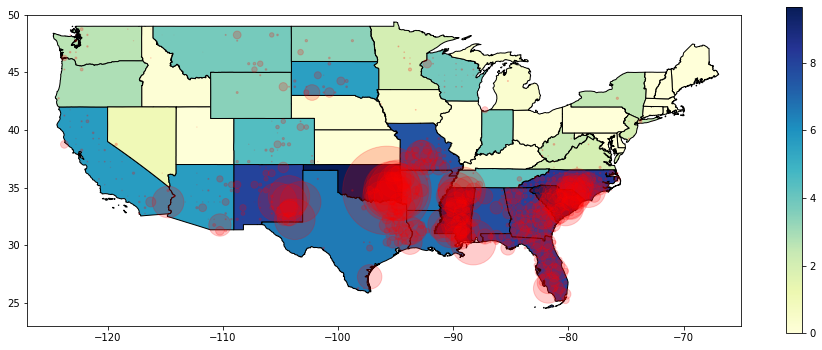

In [108]:
s=states()
lcf=[]
cf=areafire(res,wf)
dcf=dict({'States':list(cf.keys()),'Number':list(cf.values())})
dcf2=pd.DataFrame.from_dict(dcf)
for i in range(len(s.states)):
    if s.states["NAME"].iloc[i] in dcf["States"]:
        lcf.append(math.log(cf[s.states["NAME"].iloc[i]]+1))
    else:
        lcf.append(0)
s.add_column(2,"cf2",lcf)
ax = s.states.plot(column="cf2",cmap="YlGnBu",figsize=(16,12), edgecolor='k', legend=True,legend_kwds={'shrink': 0.5})
ax.set_xlim(-127, -65)
ax.set_ylim(23, 50)
wf1=wf[wf["BA"]!=0]
gdf = gpd.GeoDataFrame(
    wf1, geometry=gpd.points_from_xy(wf1.lon, wf1.lat))
gdf.plot(ax=ax, color='red',alpha=0.2,markersize=wf1["BA"],legend=True,)
plt.show()
s.delete_column("cf2")

In [80]:
import dash #installation of dash might be needed: 
#pip install jupyter-dash #uncomment this line to install
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)
geodf = gpd.read_file('../Data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
with open("../Data/USGeoJSON") as geofile:
    j_file = json.load(geofile)
    
l=[]
for i in range(len(wf)):
    p=(wf.lat.iloc[i],wf.lon.iloc[i])
    l.append(p)
coor=l
res=rg.search(coor)

available_indicators = ["None","Wind","Land Cover","Temperature","Precipitation"]
available_indicators_fire=["None","Burnt Area","Number of Wildfires"]
available_indicators_inc=["Yes","No"]
available_indicators_month=np.arange(3,10)
available_indicators_year=np.arange(1993,2016)
app.layout = html.Div([
    html.Div([
        html.H4("Options :",style={'width': '35%', 'display': 'inline-block'}),
        html.H4("Show location of wildfires :",style={'width': '33%', 'display': 'inline-block'}),
        html.H4("Type of display :",style={'width': '20%', 'display': 'inline-block'})
    ]),
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='Option1',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='None'
            )], style={'width': '32%', 'display': 'inline-block'}),

        html.Div([
            dcc.RadioItems(
                id='Option2',
                options=[{'label': i, 'value': i} for i in available_indicators_fire],
                value='Burnt Area',
                labelStyle={'display': 'inline-block'}
            )], style={'width': '32%', 'float': 'right', 'display': 'inline-block'}),
        html.Div([
            dcc.RadioItems(
                id='Option3',
                options=[{'label': i, 'value': i} for i in available_indicators_inc],
                value='No',
                labelStyle={'display': 'inline-block'}
            )], style={'width': '32%', 'float': 'right', 'display': 'inline-block'})
    ]),
    html.Div([
        dcc.Graph(
            id='indicator-graphic',
        )
    ], style={'width': '100%'}),
    html.Div([
        html.H4("Year :",style={'width': '30%', 'display': 'inline-block'}),
        html.H4("Month :",style={'width': '32%', 'display': 'inline-block'})
    ]),
    html.Div([
        html.Div(
            dcc.Dropdown(
                id='year',
                options=[{'label': i, 'value': i} for i in available_indicators_year],
                value=1993
            ), style={'width': '30%', 'display': 'inline-block'}
        ),
        html.Div(
            dcc.Slider(
                id='month',
                min=available_indicators_month.min(),
                max=available_indicators_month.max(),
                value=3,
                marks={str(i): str(i) for i in available_indicators_month},
                step=None
            ),style={'width': '30%', 'padding': '0px 20px 20px 20px','display': 'inline-block'}
        )
    ])
])

@app.callback(
    Output('indicator-graphic', 'figure'),
    Input('Option1', 'value'),
    Input('Option2', 'value'),
    Input('Option3', 'value'),
    Input('year', 'value'),
    Input('month','value'))
    
def update_graph(Option1,Option2,Option3,year,month):
    df2=df1[df1["year"]==year]
    df2=df2[df2["month"]==month]
    #s=states()
    a=0
    
    if Option1=="None":
        a=0
    elif Option1=="Wind":
        a=1
    elif Option1=="Land Cover":
        a=2
    elif Option1=="Temperature":
        a=3
    elif Option1=="Precipitation":
        a=4
    
    if Option2=="None":
        a=0
        fig=0
        #ax=s.states.boundary.plot(color="black",figsize=(16,12))
        #ax.set_xlim(-127, -65)
        #ax.set_ylim(23, 50)
        #plt.show()
    elif Option2=="Burnt Area":
        lba=[]
        ba=areafire(res,df2)
        dba=dict({'States':list(ba.keys()),'Number':list(ba.values())})
        #dba2=pd.DataFrame.from_dict(dba)
        for i in range(len(geodf)):
            if geodf["NAME"].iloc[i] in dba["States"]:
                lba.append(math.log(ba[geodf["NAME"].iloc[i]]+1))
            else:
                lba.append(0.)
        dba2=dict({'States':list(geodf.NAME),'Number':list(lba)})
        #s.add_column(2,"ba",lba)
        fig = px.choropleth_mapbox(dba2, geojson=j_file, 
          featureidkey='properties.NAME',
          locations='States',
          color='Number',
            center={'lat': 38.3544 , 'lon':-99.9981 },
            zoom=3,
        color_continuous_scale  ='OrRd',                                
          mapbox_style='carto-positron')
        
        #ax = s.states.plot(column="ba",cmap="coolwarm",figsize=(16,12), edgecolor='k', legend=True,legend_kwds={'shrink': 0.5})
        if Option3=="Yes":
            df3=df2[df2["BA"]!=0]
            #gdf = gpd.GeoDataFrame(
            #df3, geometry=gpd.points_from_xy(df3.lon, df3.lat))
            #gdf.plot(ax=ax, color='red',alpha=0.1)
        #plt.show()
        fig.update_layout(title_text="US Burnt area in 0"+str(month)+"/"+str(year), title_x=0.5,coloraxis_reversescale=False)
        #s.delete_column("ba")    
    else:
        lcf=[]
        cf=countfire(res,df2)
        dcf=dict({'States':list(cf.keys()),'Number':list(cf.values())})
        for i in range(len(geodf)):
            if geodf["NAME"].iloc[i] in dcf["States"]:
                lcf.append(math.log(cf[geodf["NAME"].iloc[i]]+1))
            else:
                lcf.append(0.)
        dcf2=dict({'States':list(geodf.NAME),'Number':lcf})
        fig = px.choropleth_mapbox(dcf2, geojson=j_file, 
          featureidkey='properties.NAME',
          locations='States',
          color='Number',
            center={'lat': 38.3544 , 'lon':-99.9981 },
            zoom=3,
        color_continuous_scale  ='OrRd',                                
          mapbox_style='carto-positron'
                           )
        #ax = s.states.plot(column="cf",cmap="coolwarm",figsize=(16,12), edgecolor='k', legend=True,legend_kwds={'shrink': 0.5})
        #ax.set_xlim(-127, -65)
        #ax.set_ylim(23, 50)
        if Option3=="Yes":
            df3=df2[df2["CNT"]!=0]
            #gdf = gpd.GeoDataFrame(
            #df3, geometry=gpd.points_from_xy(df3.lon, df3.lat))
            #gdf.plot(ax=ax, color='red',alpha=0.1)
        #plt.show()
        #s.delete_column("cf")
        fig.update_layout(title_text="US number of wildfires in 0"+str(month)+"/"+str(year), title_x=0.5,coloraxis_reversescale=False)

    return fig

if __name__ == '__main__':
    app.run_server(debug=False)
    


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Nov/2021 04:10:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2021 04:10:25] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2021 04:10:25] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Nov/2021 04:10:28] "POST /_dash-update-component HTTP/1.1" 200 -


In [18]:
import geopandas as gpd
import json
geodf = gpd.read_file('../Data/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
geodf.to_file("../Data/USGeoJSON", driver = "GeoJSON")
with open("../Data/USGeoJSON") as geofile:
    j_file = json.load(geofile)

In [19]:
j_file["features"][0]["properties"]

{'STATEFP': '31',
 'STATENS': '01779792',
 'AFFGEOID': '0400000US31',
 'GEOID': '31',
 'STUSPS': 'NE',
 'NAME': 'Nebraska',
 'LSAD': '00',
 'ALAND': 198956658395,
 'AWATER': 1371829134}

In [78]:
cf=countfire(res,wf)
dcf=dict({'States':list(cf.keys()),'Number':list(cf.values())})
dcf2=pd.DataFrame.from_dict(dcf)
title = 'US number of wildfires'
wf1=df1[df1["year"]==1993]
wf1=wf1[wf1["month"]==3]
wf2=wf1[wf1['CNT']!=0]
import plotly.express as px
import plotly.graph_objects as go

#fig=go.Figure()
#fig.add_traces(go.Choroplethmapbox(geojson=j_file, featureidkey='properties.NAME', locations=dcf2.States, z=dcf2.Number, colorscale  ='OrRd'))

#fig.add_traces(go.scatter_mapbox(lat=wf2.lat,lon=wf2.lon))
fig1 = px.choropleth_mapbox(dcf2, geojson=j_file, 
          featureidkey='properties.NAME',
          locations='States',
          color='Number',
            center={'lat': 38.3544 , 'lon':-99.9981 },
            zoom=3,
        color_continuous_scale  ='OrRd',                                
          mapbox_style='carto-positron'
                           )
fig2=px.scatter_mapbox(wf2,lat=wf2.lat,lon=wf2.lon,mapbox_style='carto-positron',color="CNT",color_continuous_scale="Viridis",center={'lat': 38.3544 , 'lon':-99.9981 },
            zoom=3,size="BA")
fig3=go.Figure(data=fig1.data+fig2.data)
fig2.update_layout(title_text=title,title_x=0.5,coloraxis_reversescale=False,)#mapbox=go.layout.Mapbox(zoom=10,center_lat = 40.5,center_lon = -105.08));
fig2.show()

In [21]:
import plotly.graph_objects as go
import pandas as pd

df_airports = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df_airports.head()

df_flight_paths = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_aa_flight_paths.csv')
df_flight_paths.head()

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'USA-states',
    lon = df_airports['long'],
    lat = df_airports['lat'],
    hoverinfo = 'text',
    text = df_airports['airport'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

flight_paths = []
for i in range(len(df_flight_paths)):
    fig.add_trace(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [df_flight_paths['start_lon'][i], df_flight_paths['end_lon'][i]],
            lat = [df_flight_paths['start_lat'][i], df_flight_paths['end_lat'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red'),
            opacity = float(df_flight_paths['cnt'][i]) / float(df_flight_paths['cnt'].max()),
        )
    )

fig.update_layout(
    title_text = 'Feb. 2011 American Airline flight paths<br>(Hover for airport names)',
    showlegend = False,
    geo = dict(
        scope = 'north america',
        projection_type = 'azimuthal equal area',
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

In [95]:
fig=go.Figure()
fig.show()

In [110]:
states1

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987..."
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.73571 41.60336, -82.71880 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((-85.60516 34.98468, -85.55259 34.984..."


In [ ]:
s=states()
lcf=[]
cf=countfire(res,wf)
dcf=dict({'States':list(cf.keys()),'Number':list(cf.values())})
dcf2=pd.DataFrame.from_dict(dcf)
for i in range(len(s.states)):
    if s.states["NAME"].iloc[i] in dcf["States"]:
        lcf.append(math.log(cf[s.states["NAME"].iloc[i]]+1))
    else:
        lcf.append(0)
s.add_column(2,"cf",lcf)
ax = s.states.plot(column="cf",cmap="coolwarm",figsize=(16,12), edgecolor='k', legend=True,legend_kwds={'shrink': 0.5})
ax.set_xlim(-127, -65)
ax.set_ylim(23, 50)
wf1=wf[wf["BA"]!=0]
gdf = gpd.GeoDataFrame(
    wf1, geometry=gpd.points_from_xy(wf1.lon, wf1.lat))
gdf.plot(ax=ax, color='black',alpha=0.1,markersize=wf1["BA"])
plt.show()
s.delete_column("cf")

In [14]:
import bokeh
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider, Column)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
from bokeh.models import Range1d
from shapely.geometry import Point
df2 = df1.copy()
#extract1=df1[ (df1["year"]==year) & (df1["month"]==month) ]
geometry = []
for index, row in df2.iterrows():
    geometry.append(Point(row["lon"], 
                          row["lat"]))
df2["geometry"] = geometry

lead_sites_crs = {"init":"epsg:4326"}
lead_sites_geo = gpd.GeoDataFrame(df2,
                                  crs = lead_sites_crs,
                             geometry = df2.geometry)

lead_sites_geo["x"] = [geometry.x for geometry in lead_sites_geo["geometry"]]
lead_sites_geo["y"] = [geometry.y for geometry in lead_sites_geo["geometry"]]
p_df = lead_sites_geo.drop("geometry", axis = 1).copy()
sitesource = ColumnDataSource(p_df)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [17]:
#inspired by: 
#- https://towardsdatascience.com/walkthrough-mapping-basics-with-bokeh-and-geopandas-in-python-43f40aa5b7e9
#- https://stackoverflow.com/questions/55362916/how-to-pass-the-slider-value-in-bokeh-back-to-python-code

s=states()

slider1 = Slider(title = "Month", start = 3, end = 9, step = 1, value = 3)
slider2= Slider(title="year",start=1993, end=2015, step=1,value=1993)

month=slider1.value
year=slider2.value

callback = CustomJS(args = dict(source=sitesource), 
                    code = """source.change.emit();""")
slider1.js_on_change('value', callback)
slider2.js_on_change('value', callback)

indices = CustomJSFilter(args=dict( month=slider1, year=slider2),
                    code="""
    var indices = [];
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
 if ((source.data[‘month’][i] == month.value)&(source.data[‘year’][i] == year.value)){
 indices.push(true);
 } else {
 indices.push(false);
 }
}
return indices;
""")

view = CDSView(source = sitesource, filters = [indices])
extract=df1[ (df1["year"]==year) & (df1["month"]==month) ]
lcf=[]
cf=countfire(res,extract)
dcf=dict({'States':list(cf.keys()),'Number':list(cf.values())})
dcf2=pd.DataFrame.from_dict(dcf)
for i in range(len(s.states)):
    if s.states["NAME"].iloc[i] in dcf["States"]:
        lcf.append(math.log(cf[s.states["NAME"].iloc[i]]+1))
    else:
        lcf.append(0)
s.add_column(2,"cf",lcf)
geosource = GeoJSONDataSource(geojson = s.states.to_json())
s.delete_column("cf")

# Define color palettes
palette = brewer['YlGnBu'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 8)
# Define custom tick labels for color bar.
tick_labels = {"0": "2⁰", "1": "2¹",
 "2":"2²", "3":"2³",
 "4":"2⁴", "5":"2⁵",
 "6":"2⁶", "7":"2⁷",
 "8":"2⁸+"}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = "horizontal",
                     major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Wildfire in 0'+str(month)+'/'+str(year), 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.x_range=Range1d(-127, -65)
p.y_range=Range1d(23, 50)
# Add patch renderer to figure.
states1 = p.patches('xs','ys', source = geosource,
                   fill_color = {"field" :'cf',
                                 "transform" : color_mapper},
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)

sites = p.circle('x', 'y', source = sitesource, color = 'red', 
                 size = 'CNT', alpha = 0.3, view = view)

    
# Create hover tool
p.add_tools(HoverTool(renderers = [states1],
                      tooltips = [('State','@NAME'),
                                ('CNT','@cf')]))
p.add_tools(HoverTool(renderers = [sites],
                      tooltips = [('Number of Wildfires', '@CNT'),
                                  ('Latitude', '@lat'),
                                  ('Longitude','@lon')]))

p.add_layout(color_bar, "below")


layout3 = column(p, Column(slider1),Column(slider2))
show(layout3)


RuntimeError: Models must be owned by only a single document, ColumnDataSource(id='1002', ...) is already in a doc

In [ ]:
s=states()

slider1 = Slider(title = "Month", start = 3, end = 9, step = 1, value = 3)
slider2= Slider(title="year",start=1993, end=2015, step=1,value=1993)

month=slider1.value
year=slider2.value

callback = CustomJS(args = dict(source=sitesource), 
                    code = """source.change.emit();""")
slider1.js_on_change('value', callback)
slider2.js_on_change('value', callback)

indices = CustomJSFilter(args=dict( month=slider1, year=slider2),
                    code="""
    var indices = [];
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
 if ((source.data[‘month’][i] == month.value)&(source.data[‘year’][i] == year.value)){
 indices.push(true);
 } else {
 indices.push(false);
 }
}
return indices;
""")

view = CDSView(source = sitesource, filters = [indices])
extract=df1[ (df1["year"]==slider2.value) & (df1["month"]==slider1.value) ]
lba=[]
ba=areafire(res,extract)
dba=dict({'States':list(ba.keys()),'Number':list(ba.values())})
dba2=pd.DataFrame.from_dict(dba)
for i in range(len(s.states)):
    if s.states["NAME"].iloc[i] in dba["States"]:
        lba.append(math.log(ba[s.states["NAME"].iloc[i]]+1))
    else:
        lba.append(0)
s.add_column(2,"ba",lba)
geosource = GeoJSONDataSource(geojson = s.states.to_json())
s.delete_column("ba")

# Define color palettes
palette = brewer['YlGnBu'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 8)
# Define custom tick labels for color bar.
tick_labels = {"0": "2⁰", "1": "2¹",
 "2":"2²", "3":"2³",
 "4":"2⁴", "5":"2⁵",
 "6":"2⁶", "7":"2⁷",
 "8":"2⁸+"}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = "horizontal",
                     major_label_overrides = tick_labels)

# Create figure object.
p = figure(title = 'Wildfire in 0'+str(month)+'/'+str(year), 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.x_range=Range1d(-127, -65)
p.y_range=Range1d(23, 50)
# Add patch renderer to figure.
states1 = p.patches('xs','ys', source = geosource,
                   fill_color = {"field" :'ba',
                                 "transform" : color_mapper},
                   line_color = "gray", 
                   line_width = 0.25, 
                   fill_alpha = 1)

sites = p.circle('x', 'y', source = sitesource, color = 'red', 
                 size = 'BA', alpha = 0.3, view = view)

    
# Create hover tool
p.add_tools(HoverTool(renderers = [states1],
                      tooltips = [('State','@NAME'),
                                ('Burnt Area','@ba')]))
p.add_tools(HoverTool(renderers = [sites],
                      tooltips = [('Burnt Area', '@BA'),
                                  ('Latitude', '@lat'),
                                  ('Longitude','@lon')]))

p.add_layout(color_bar, "below")


layout2 = column(p, Column(slider1),Column(slider2))
show(layout2)



In [156]:
df1

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
0,0.0,0.000000,-95.25,49.25,0.24,1993,3,0.000006,0.015857,0.000023,...,0.222032,0.166899,265.457680,268.867126,-0.005898,9.187450e+06,-5231370.50,97849.906250,-0.000340,0.000448
1,0.0,0.000000,-94.75,49.25,0.39,1993,3,0.000005,0.002749,0.000002,...,0.184119,0.142053,265.521764,268.412354,-0.001131,6.993830e+06,-4851900.00,97954.703125,-0.000264,0.000462
2,0.0,0.000000,-122.75,48.75,0.48,1993,3,0.002420,0.103964,0.003870,...,-0.952649,0.856508,276.699820,280.594666,-0.010519,1.052566e+07,-4860741.00,100808.468750,-0.001945,0.004545
3,3.0,8.000000,-122.25,48.75,1.00,1993,3,0.002988,0.237442,0.004040,...,-0.845677,0.462569,274.943327,278.574371,-0.008420,9.359787e+06,-4653411.50,98474.648438,-0.001256,0.006174
4,0.0,0.000000,-121.75,48.75,1.00,1993,3,0.000000,0.004782,0.000196,...,-0.504174,0.195447,271.235317,274.578064,-0.005976,7.479946e+06,-3889238.75,91660.625000,-0.000502,0.008110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563978,6.0,134.600006,-80.75,25.75,1.00,2015,9,0.014934,0.017630,0.001066,...,-0.464231,0.159478,296.832658,300.201447,-0.006076,1.632964e+07,-3884615.75,101323.140625,-0.004034,0.006132
563979,1.0,30.000000,-80.25,25.75,0.66,2015,9,0.014798,0.014336,0.001253,...,-0.649578,0.404771,297.139517,300.414673,-0.005535,1.552289e+07,-3794893.75,101300.398438,-0.003913,0.006199
563980,0.0,0.000000,-81.25,25.25,0.28,2015,9,0.000000,0.000000,0.000000,...,-0.849243,0.676130,297.105902,301.003082,-0.007343,1.738194e+07,-3929039.00,101333.078125,-0.004233,0.003420
563981,2.0,179.100006,-80.75,25.25,0.76,2015,9,0.015875,0.039337,0.000373,...,-0.838257,0.589142,297.059054,300.905426,-0.006938,1.732889e+07,-4057722.00,101332.671875,-0.004125,0.003929


In [ ]:
sites_df = pd.read_csv('data/sites_2018.csv')
lead_samples = pd.read_csv('data/lead_samples_2018.csv')

lead_sites = lead_per_l.merge(sites_no_dup,
                          left_on = ‘MonitoringLocationIdentifier’,
                          right_on = ‘MonitoringLocationIdentifier’)
lead_sites_sorted = lead_sites.sort_values(by = ‘ActivityStartDate’)
# After dropping duplicates by date, 12,249 data points
lead_sites_dropdup = lead_sites_sorted.drop_duplicates(subset = [‘MonitoringLocationIdentifier’, ‘ActivityStartDate’], keep = ‘last’).reset_index(drop = True)
# Drop data points not in the contiguous USA, 10,341 data points
lead_sites_dropdup = lead_sites_dropdup[(lead_sites_dropdup[‘LongitudeMeasure’] <= -60) 
                 & (lead_sites_dropdup[‘LongitudeMeasure’] >= -130)
                 & (lead_sites_dropdup[‘LatitudeMeasure’] <= 50) 
                 & (lead_sites_dropdup[‘LatitudeMeasure’] >= 20)]
# Create Month column for plotting Slider
lead_sites_dropdup[‘Month’] = [int(x.split(‘-’)[1]) for x in lead_sites_dropdup[‘ActivityStartDate’]]
# Create shapely.Point objects based on longitude and latitude
geometry = []
for index, row in lead_sites_dropdup.iterrows():
    geometry.append(Point(row[‘LongitudeMeasure’], 
                          row[‘LatitudeMeasure’]))
lead_sites_contig = lead_sites_dropdup.copy()
lead_sites_contig[‘geometry’] = geometry

# Read dataframe to geodataframe
lead_sites_crs = {‘init’: ‘epsg:4326’}
lead_sites_geo = gpd.GeoDataFrame(lead_sites_contig,
                                  crs = lead_sites_crs,
                             geometry = lead_sites_contig.geometry)
# Get x and y coordinates
lead_sites_geo[‘x’] = [geometry.x for geometry in lead_sites_geo[‘geometry’]]
lead_sites_geo[‘y’] = [geometry.y for geometry in lead_sites_geo[‘geometry’]]
p_df = lead_sites_geo.drop(‘geometry’, axis = 1).copy()
sitesource = ColumnDataSource(p_df)

# Make a slider object to toggle the month shown
slider = Slider(title = ‘Month’, 
                start = 1, end = 12, 
                step = 1, value = 1)

# This callback triggers the filter when the slider changes
callback = CustomJS(args = dict(source=sitesource), 
                    code = """source.change.emit();""")
slider.js_on_change('value', callback)
# Creates custom filter that selects the rows of the month based on the value in the slider
custom_filter = CustomJSFilter(args = dict(slider = slider, 
                                           source = sitesource), 
                               code = """
var indices = [];
// iterate through rows of data source and see if each satisfies some constraint
for (var i = 0; i < source.get_length(); i++){
 if (source.data[‘Month’][i] == slider.value){
 indices.push(true);
 } else {
 indices.push(false);
 }
}
return indices;
""")
# Uses custom_filter to determine which set of sites are visible
view = CDSView(source = sitesource, filters = [custom_filter])

# Plots the water sampling sites based on month in slider
sites = p.circle('x', 'y', source = sitesource, color = 'red', 
                 size = 5, alpha = 0.3, view = view)
# Add hover tool
p.add_tools(HoverTool(renderers = [sites],
                      tooltips = [('Organization', '@OrganizationFormalName'),
                                  ('Location Type', '@MonitoringLocationTypeName'),
                                  ('Date', '@ActivityStartDate'),
                                  ('Lead (ug/l)', '@LeadValue_ug_l')]))
# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p, widgetbox(slider))
show(layout)

In [171]:
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, show

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), width=400, height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (let i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

show(layout)

In [203]:
view

CDSView(id='5968', ...)

In [177]:
print(ColumnDataSource(df2))

ColumnDataSource(id='5948', ...)


In [185]:
conda install shapely

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [186]:
import shapely

In [194]:
shapely.geometry.Point

shapely.geometry.point.Point